[[ 225.32718442]
 [-215.98630167]]
8109.477177532315
[[ 225.32718442]
 [-215.98630167]]
8109.477177532315
[[ 225.32718442]
 [-215.98630167]]
8109.477177532315
[[ 225.32718442]
 [-215.98630167]]
8109.477177532315
[[ 225.32718442]
 [-215.98630167]]
8109.477177532315
[[ 225.32718442]
 [-215.98630167]]
8109.477177532315


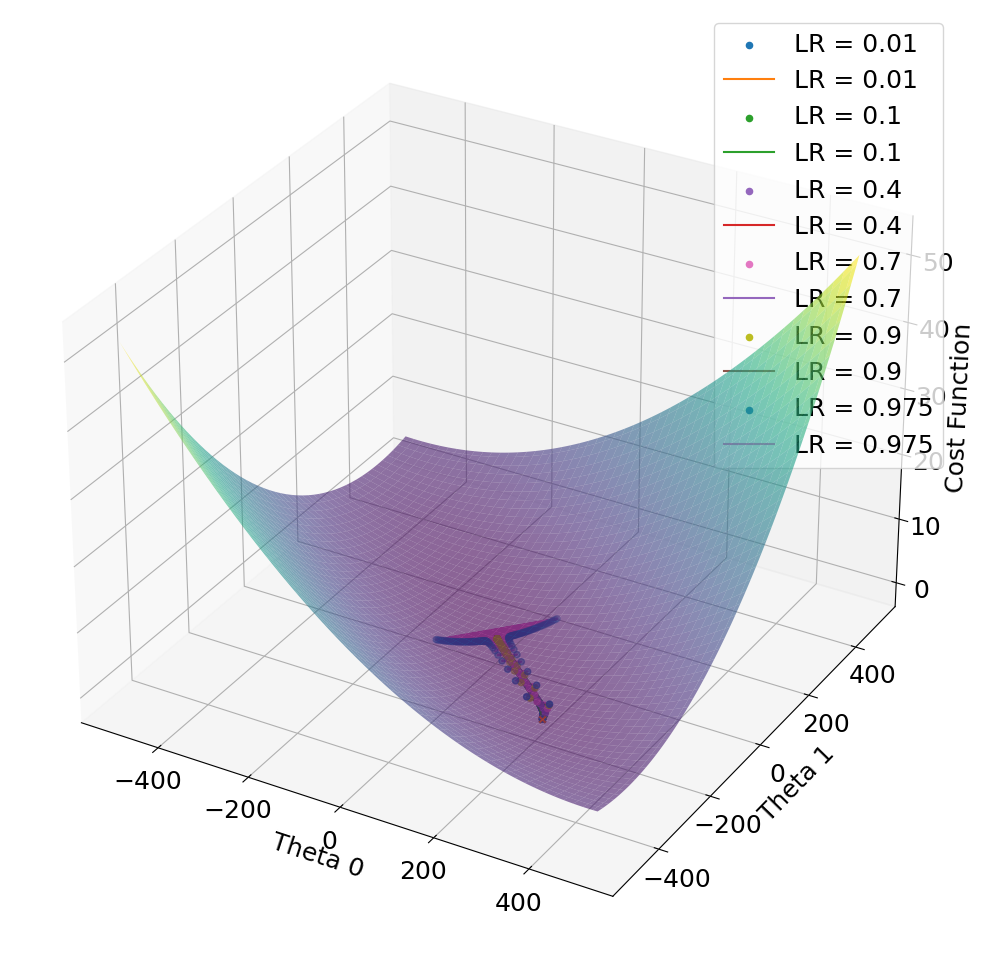

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data for a convex cost function example
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 1 + 3*X + np.random.rand(100, 1)

# Define the cost function for a simple linear regression with two parameters
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
    return cost

# Create a grid of theta values for visualization
theta0_vals = np.linspace(-500, 500, 100)
theta1_vals = np.linspace(-500, 500, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

X_b = np.c_[np.ones((100, 1)), X]

# Calculate cost for different theta values
m = len(y)
for i in range(100):
    for j in range(100):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j]]).reshape(2, 1)
        cost_grid[i, j] = compute_cost(np.c_[np.ones((m, 1)), X], y, theta)

# Initialize a common initial theta for all learning rates
initial_theta = np.random.randn(2, 1) * 200

# Initialize theta and perform gradient descent for multiple learning rates
learning_rates = [0.01, 0.1, 0.4, 0.7, 0.9, 0.975]  # List of learning rates to test
num_iterations = 150

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, cost_grid/10000, cmap='viridis', alpha=0.6)

cost_history_plots = []  # To store cost history plots for different learning rates
regression_line_plots = []  # To store regression line plots for different learning rates


for learning_rate in learning_rates:
    theta = initial_theta.copy()  # Use the same initial theta for all learning rates
    theta_history = [theta.copy()]
    
    for iteration in range(num_iterations):
        gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())

    # Extract theta values from the history
    theta_history = np.array(theta_history)

    # Calculate cost values along the optimization path
    cost_history = [compute_cost(X_b, y, theta.reshape(2, 1)) for theta in theta_history]
    cost_history = np.array(cost_history).flatten()  # Flatten to 1D array

    print(theta_history[0])
    print(cost_history[0])

    # Plot the gradient descent path for the current learning rate
    ax.scatter(theta_history[:, 0], theta_history[:, 1], cost_history/10000, marker='o', label=f'LR = {learning_rate}')
    ax.scatter(theta_history[0, 0], theta_history[0, 1], cost_history[0]/10000, marker='x')
    ax.plot(theta_history[:, 0].reshape(-1), theta_history[:, 1].reshape(-1), cost_history/10000, label=f'LR = {learning_rate}')

    cost_history_plots.append(cost_history) # save the cost history
  
    # Calculate the regression line for different iterations
    regression_lines = [X_b.dot(theta.reshape(2, 1)) for theta in theta_history]
    regression_line_plots.append(regression_lines)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost Function')
#ax.set_title('Gradient Descent Paths for Different Learning Rates (Same Initial Theta)')
ax.legend()
plt.tight_layout()
plt.show()



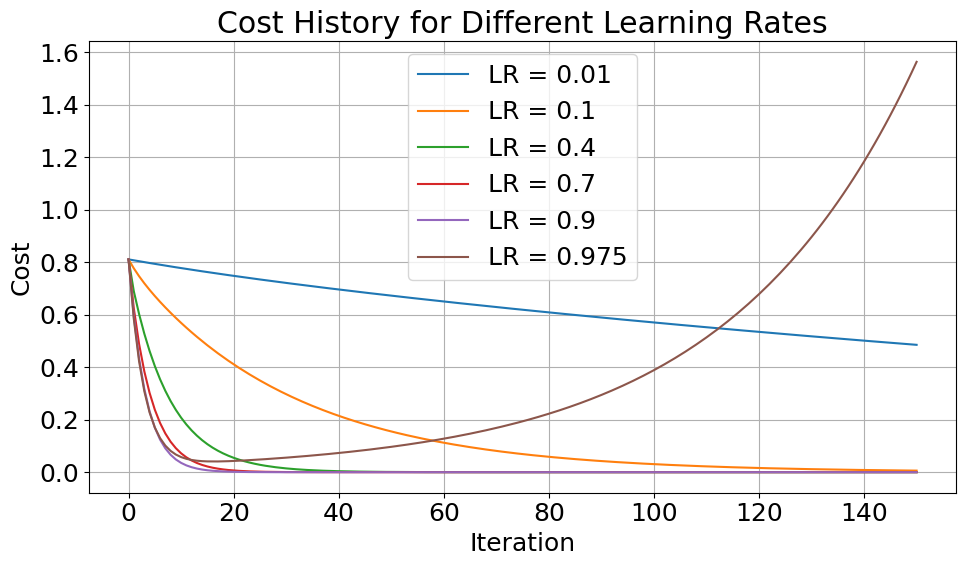

In [51]:
# Create a separate plot to visualize cost history for different iterations
fig_cost_history = plt.figure(figsize=(10, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.plot(range(num_iterations + 1), cost_history_plots[i]/10000, label=f'LR = {learning_rate}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History for Different Learning Rates')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

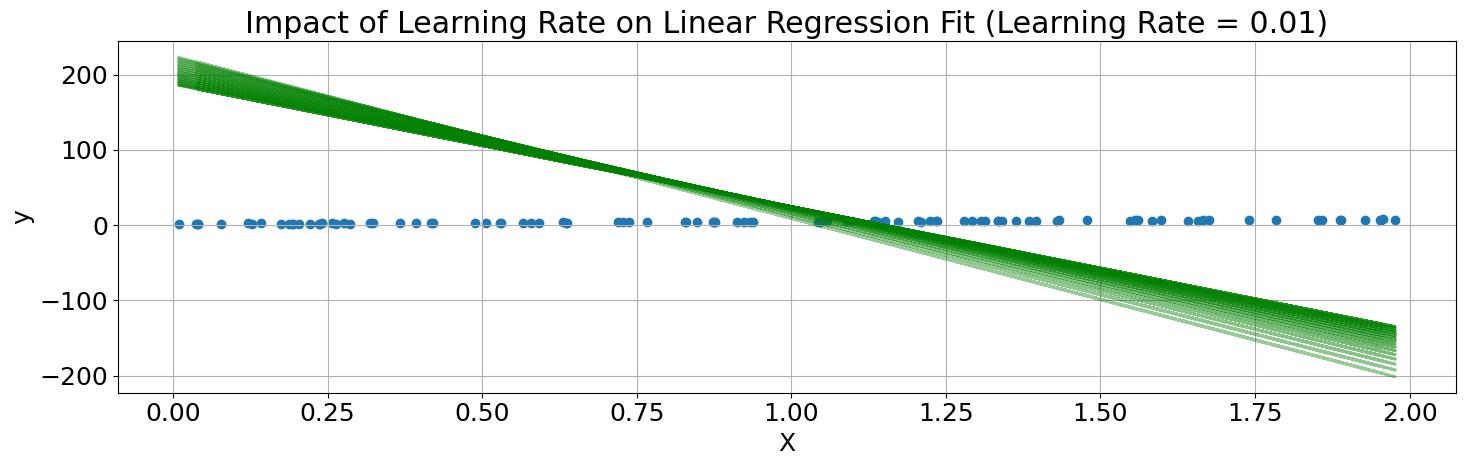

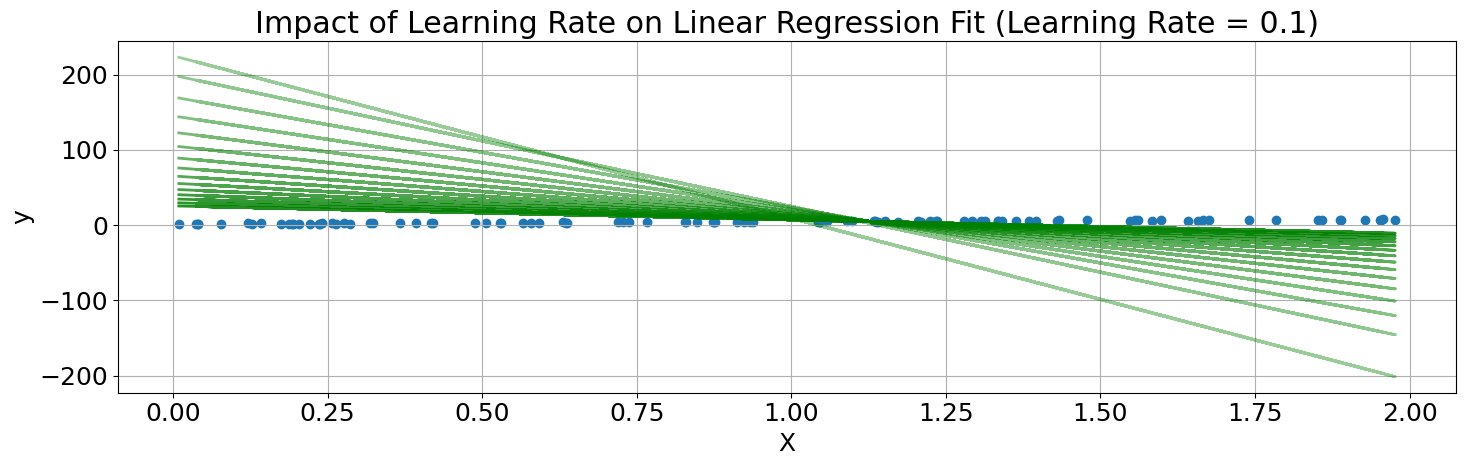

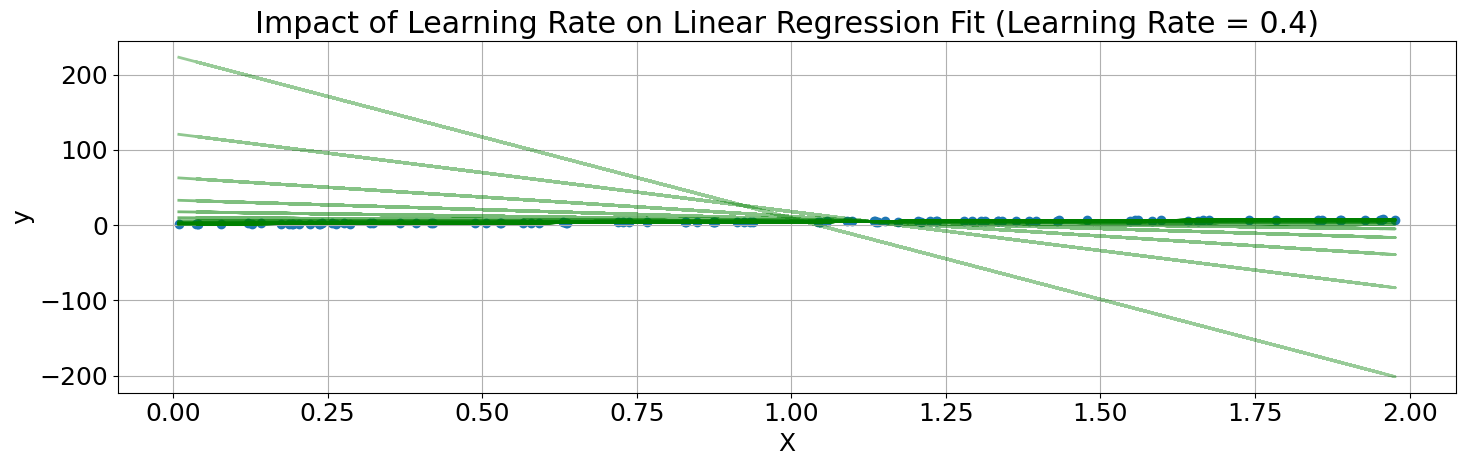

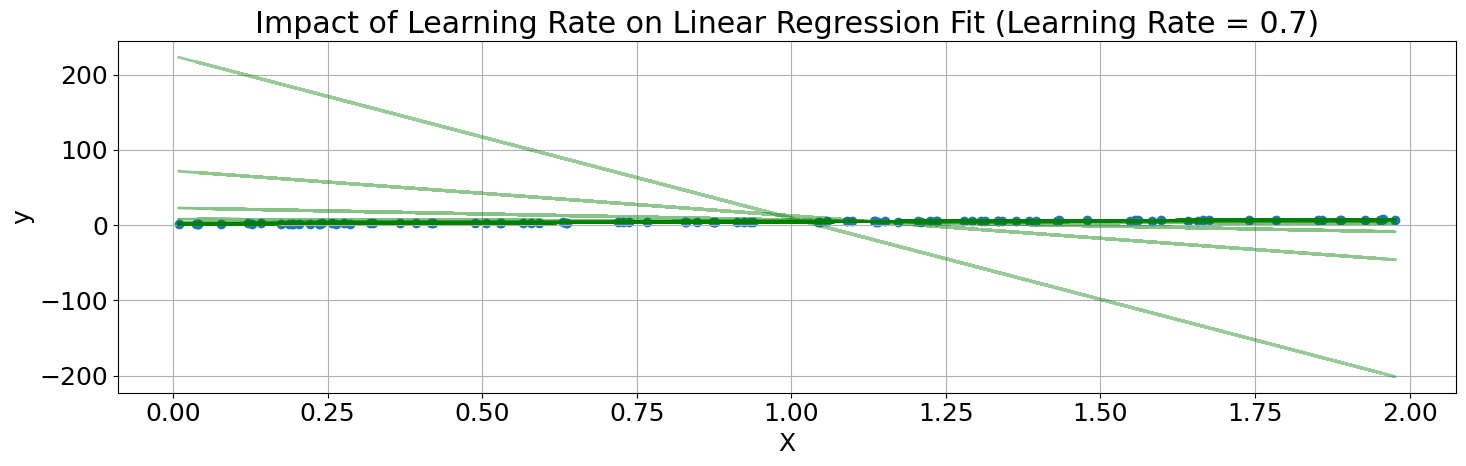

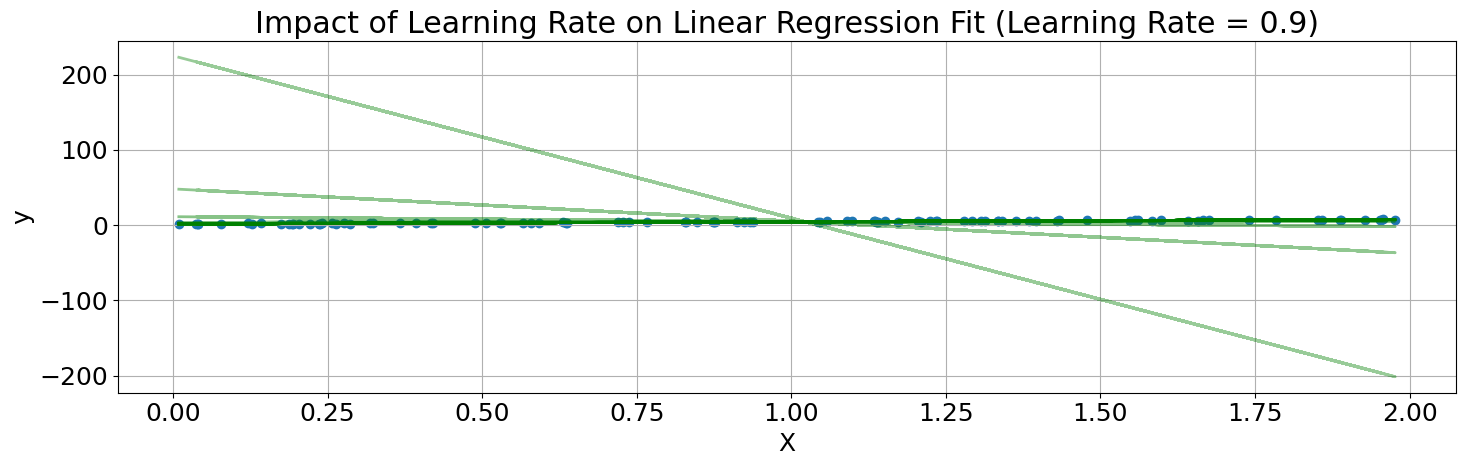

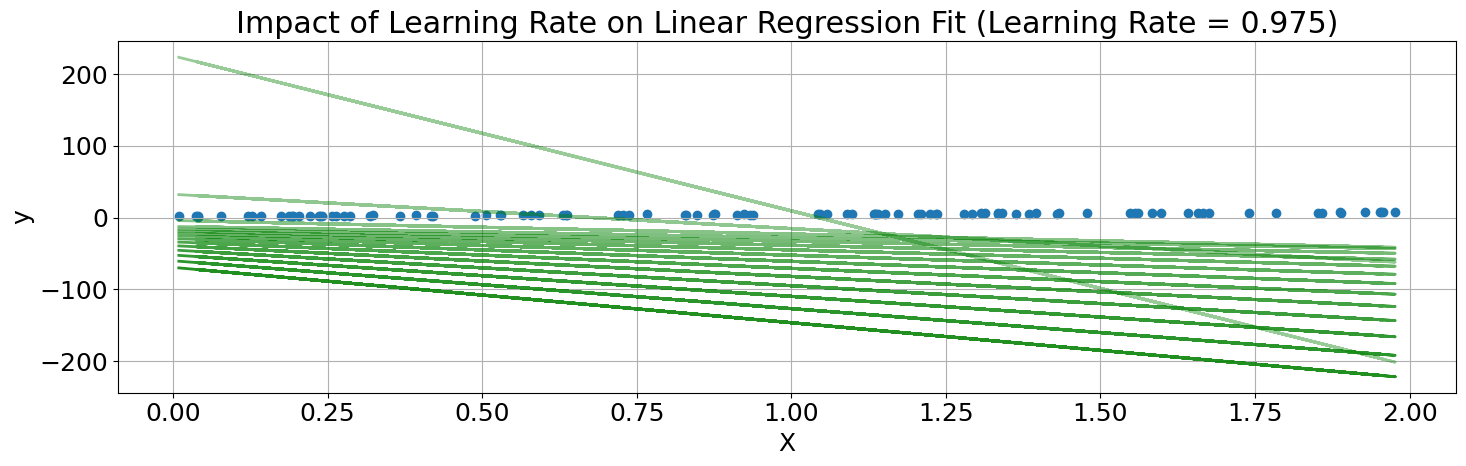

In [53]:
for i, learning_rate in enumerate(learning_rates):
    fig_regression_lines = plt.figure(figsize=(15, 5))
    plt.scatter(X, y, label=f'LR = {learning_rate}', alpha=1)
    
    for j in range(0, num_iterations, 10):  # Plot every 10 iterations
        opacity = 0.4 + 0.5 * (j + 1) / num_iterations  # Adjust opacity from 0.5 to 1 based on iteration count
        plt.plot(X, regression_line_plots[i][j], label=f'Iteration {j}', linewidth=2, color='green', alpha=opacity)
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Impact of Learning Rate on Linear Regression Fit (Learning Rate = {learning_rate})')
    #plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()